In [1]:
# https://medium.com/@The_Gambitier/matplotlib-essentials-e376ed954201
# importing librarires
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
# We will use the `plt.style` directive to choose appropriate aesthetic styles for our figures.
# Setting Styles
plt.style.use('seaborn-colorblind')
# To list all available styles, use:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


    %matplotlib notebook will lead to interactive plots embedded within the notebook
    %matplotlib inline will lead to static images of your plot embedded in the notebook
    it needs to be done only once per kernel/session


<Figure size 432x288 with 0 Axes>

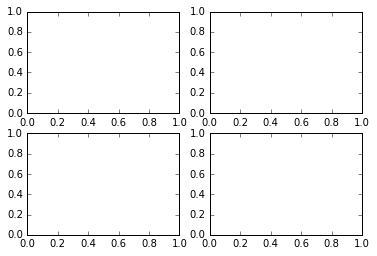

In [6]:
%matplotlib inline
fig = plt.figure()  # an empty figure with no axes
fig, ax_lst = plt.subplots(2, 2)  # a figure with a 2x2 grid of Axes

All of plotting functions expect np.array or np.ma.masked_array as input. Classes that are ‘array-like’ such as pandas data objects and np.matrix may or may not work as intended. It is best to convert these to np.array objects prior to plotting.

In [8]:
a = pd.DataFrame(np.random.rand(4,5), columns = list('abcde'))
a.values

b = np.matrix([[1,2],[3,4]])
np.asarray(b)

array([[1, 2],
       [3, 4]])

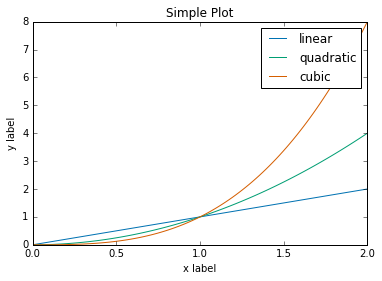

In [12]:
# Stateful example
x = np.linspace(0, 2, 100)
plt.plot(x, x, label='linear')
plt.plot(x, x**2, label='quadratic')
plt.plot(x, x**3, label='cubic')
plt.xlabel('x label')
plt.ylabel('y label')
plt.title("Simple Plot")
plt.legend()
plt.show()

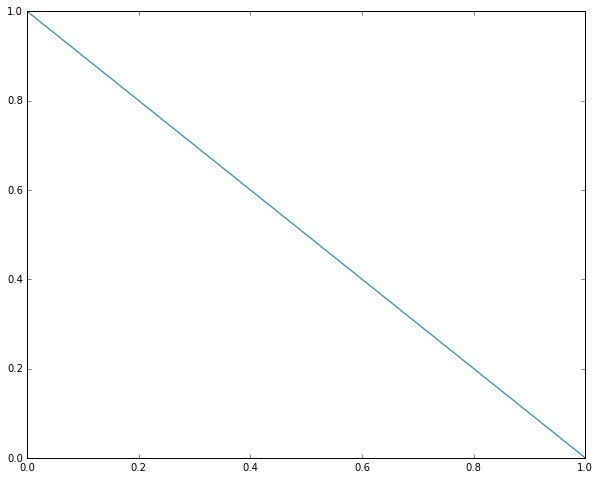

In [13]:
# changing size of fig
plt.plot([0,1], [1,0])
plt.gcf().set_size_inches([10,8])

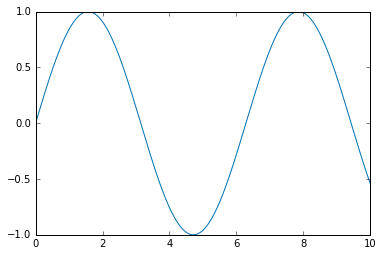

In [14]:
# np.linspace return evenly spaced numbers over a specified interval.
x = np.linspace(0, 10, 1000)
plt.plot(x, np.sin(x))

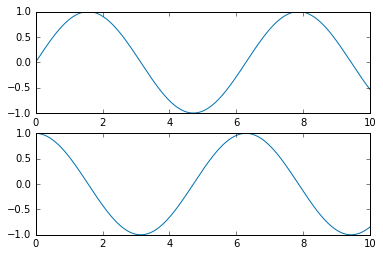

In [15]:
# another example: subplot

# create the first of two panels and set current axis
plt.subplot(2, 1, 1) # (rows, columns, panel number)
plt.plot(x, np.sin(x))

# create the second panel and set current axis
plt.subplot(2, 1, 2)
plt.plot(x, np.cos(x));

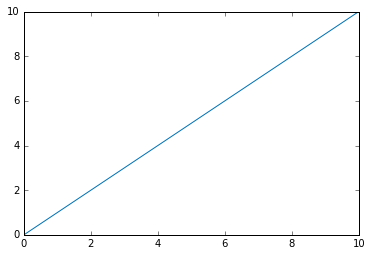

In [16]:
# Stateless Example
# The only time that the OO approach uses pyplot, to create a Figure and Axes:
data = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
fig = plt.figure()
ax = plt.axes()
line = ax.plot(data)

what does argument in fig.add_subplot(111) mean?

These are subplot grid parameters encoded as a single integer. For example, “111” means “1x1 grid, first subplot” and “234” means “2x3 grid, 4th subplot”.

Alternative form for add_subplot(111) is add_subplot(1, 1, 1).

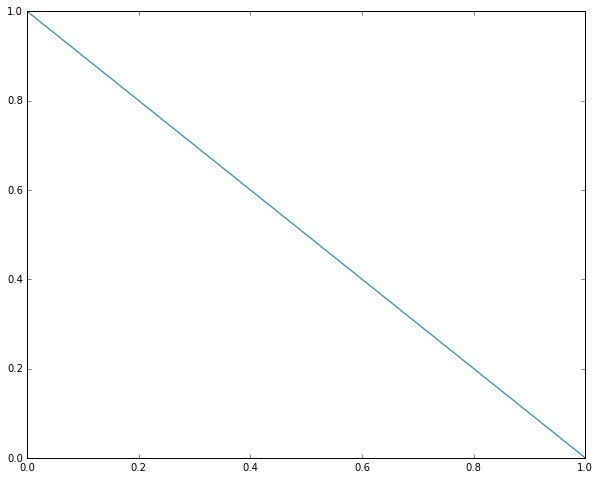

In [17]:
fig = plt.figure()
ax = fig.add_subplot(111)
li = ax.plot([0,1], [1,0])
fig.set_size_inches([10, 8])

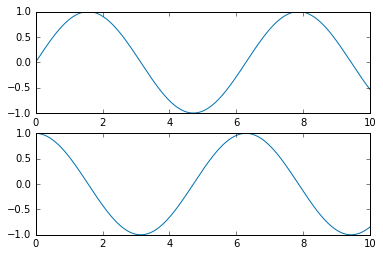

In [18]:
# First create a grid of plots
# ax will be an array of two Axes objects
fig, ax = plt.subplots(2)

# Call plot() method on the appropriate object
ax[0].plot(x, np.sin(x))
ax[1].plot(x, np.cos(x));

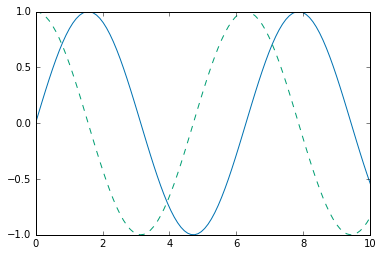

In [21]:
# np.linspace return evenly spaced numbers over a specified interval.
x = np.linspace(0, 10, 100)# create a plot figure
fig = plt.figure()
plt.plot(x, np.sin(x), '-')
plt.plot(x, np.cos(x), '--');

One nice feature of Matplotlib is the ability to save figures in a wide variety of formats. Saving a figure can be done using the savefig()command. For example, to save the previous figure as a PNG file, you can run this:

fig.savefig('my_figure.png')

To confirm that it contains what we think it contains, let’s use the IPython Image object to display the contents of this file:

from IPython.display import Image
Image('my_figure.png')





Basics

For all Matplotlib plots, we start by creating a figure and an axes. In their simplest form, a figure and axes can be created as follows:

    The purpose of using plt.figure() is to create a figure object.
    The whole figure is regarded as the figure object.
    It is necessary to explicitly use plt.figure() when we want to tweak the size of the figure and when we want to add multiple Axes objects in a single figure.

<Figure size 432x288 with 0 Axes>

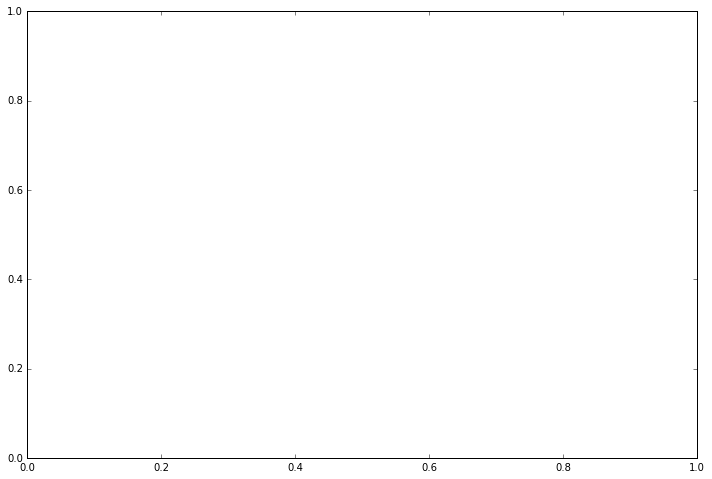

In [24]:
fig = plt.figure() # default size
fig = plt.figure(figsize=(12,8)) # specific 
#output: <Figure size 432x288 with 0 Axes>
#output: <Figure size 864x576 with 0 Axes>

# Add an axes to the current figure and make it the current axes.
ax = plt.axes()

array([[<AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>]], dtype=object)

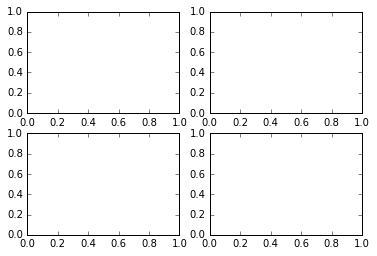

In [25]:
fig, ax_lst = plt.subplots(2, 2)
#so we'll be having list of axes we just created

ax_lst

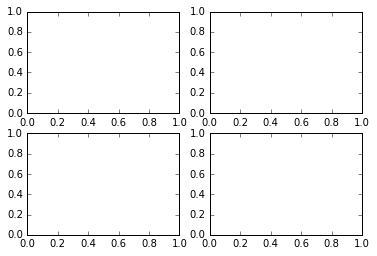

In [26]:
fig1, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)

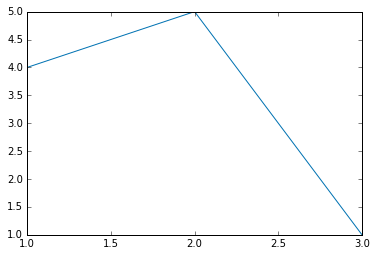

In [27]:
# plt.show() it will display the current figure that you are working on.
plt.plot([1,2,3],[4,5,1])
plt.show()

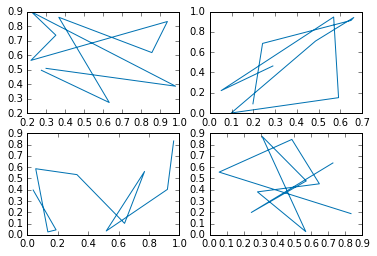

In [28]:
x1 = np.random.rand(10)
x2 = np.random.rand(10)
x3 = np.random.rand(10)
x4 = np.random.rand(10)
y1 = np.random.rand(10)
y2 = np.random.rand(10)
y3 = np.random.rand(10)
y4 = np.random.rand(10)

figure2, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
ax1.plot(x1,y1)
ax2.plot(x2,y2)
ax3.plot(x3,y3)
ax4.plot(x4,y4)

plt.show()

plt.draw() will re-draw the figure. The plt.draw docs state:

    This is used in interactive mode to update a figure that has been altered using one or more plot object method calls;
    it is not needed if figure modification is done entirely with pyplot functions, if a sequence of modifications ends with a pyplot function, or if matplotlib is in non-interactive mode and the sequence of modifications ends with show() or savefig().

This seems to suggest that using plt.draw() before plt.show() when not in interactive mode will be redundant the vast majority of the time. The only time you may need it is if you are doing some very strange modifications that don’t involve using pyplot functions

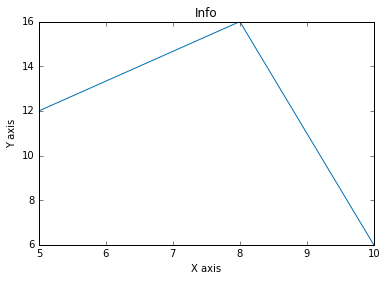

In [29]:
# Setting Labels and Title:
x=[5,8,10]
y=[12,16,6]
plt.plot(x,y)
plt.title('Info')
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.show()

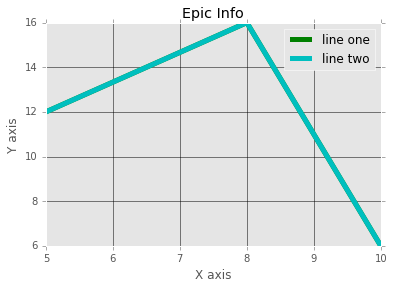

In [31]:
# How to use style graph
plt.style.use('seaborn-colorblind')
x=[5,8,10]
y=[12,16,6]
x2=[6,9,11]
y2=[6,15,7]
plt.plot(x,y, 'g',label='line one',linewidth=5)
plt.plot(x,y,'c',label='line two',linewidth=5)
plt.title('Epic Info')
plt.xlabel('X axis')
plt.ylabel('Y axis')
plt.legend()
plt.grid(True,color='k')
plt.show()

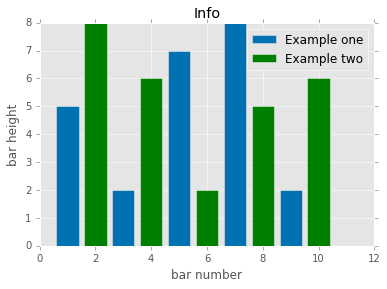

In [32]:
# Bar Graph
plt.bar([1,3,5,7,9],[5,2,7,8,2], label= 'Example one')
plt.bar([2,4,6,8,10],[8,6,2,5,6], label= 'Example two',color='g')
plt.legend()
plt.title('Info')
plt.xlabel('bar number')
plt.ylabel('bar height')
plt.show()

No handles with labels found to put in legend.


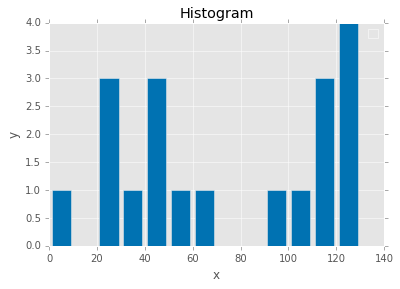

In [33]:
# Histogram
population_ages = [22,55,62,45,21,22,34,42,42,4,99,102,110,120,121,122,130,111,115]
bins=[0,10,20,30,40,50,60,70,80,90,100, 110,120,130]
plt.hist(population_ages, bins, histtype='bar', rwidth=0.8)
plt.title('Histogram')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

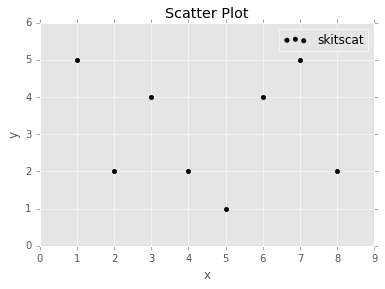

In [34]:
# Scatter Plot
x=[1,2,3,4,5,6,7,8]
y=[5,2,4,2,1,4,5,2]
plt.scatter(x,y, label='skitscat', color='k')
plt.title('Scatter Plot')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

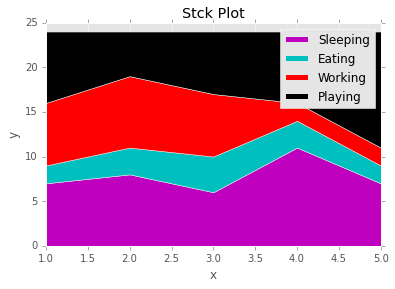

In [35]:
# Stack Plot
days=[1,2,3,4,5]
sleeping=[7,8,6,11,7]
eating=[2,3,4,3,2]
working=[7,8,7,2,2]
playing=[8,5,7,8,13]
plt.plot([],[],color= 'm', label='Sleeping', linewidth=5)
plt.plot([],[],color= 'c', label='Eating', linewidth=5)
plt.plot([],[],color= 'r', label='Working', linewidth=5)
plt.plot([],[],color= 'k', label='Playing', linewidth=5)
plt.stackplot(days,sleeping,eating,working,playing, colors= ['m', 'c', 'r', 'k'])
plt.title('Stck Plot')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

# Before this point was a medium article.
# After this point is the LHL walkthrough

In this hands-on tutorial, we will learn how to create multiple types of graphs with Matplotlib stateful approach. We will also learn how to customize the graphs with legends, annotations, and so on. Let's begin with importing necessary libraries.

In [36]:
 import numpy
import numpy as np

# import matplotlib
import matplotlib.pyplot as plt

# set the figure size for each figure in this tutorial
plt.rcParams["figure.figsize"] = (10,6)

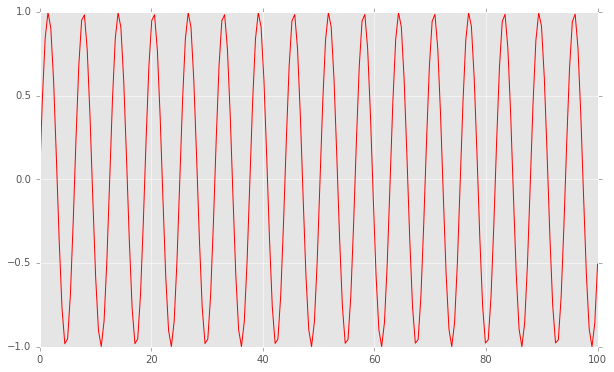

In [38]:
# LINE PLOT
# 200 values from the interval <0,100>, equidistantly divided
x = np.linspace(0,100,200)
y = np.sin(x)

# a line plot
plt.plot(x,y,'red')
plt.show()

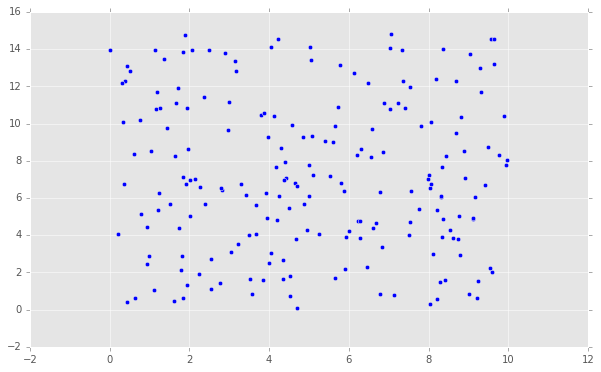

In [39]:
# SCATTER PLOT
# 200 random values from the interval <0,10>
x = 10*np.random.rand(200,1)

# 200 random values from the interval <0,15>
y = 15*np.random.rand(200,1)

# a scatter plot 
plt.scatter(x,y)
plt.show()

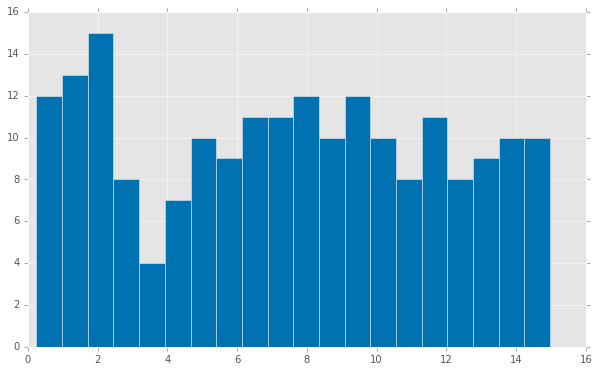

In [40]:
# HISTOGRAM
# 200 random values from the interval <0,15>
y = 15*np.random.rand(200,1)

# a histogram with 20 bins
plt.hist(y,bins=20)
plt.show()

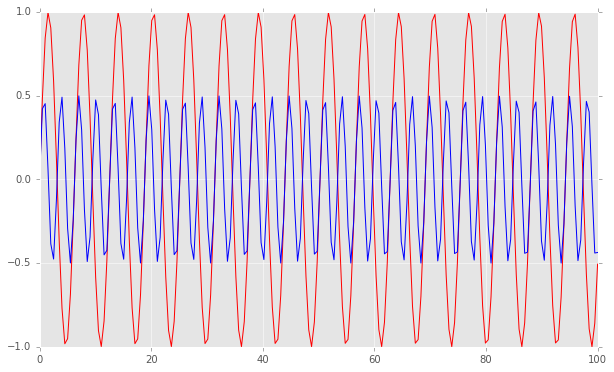

In [41]:
# GRAPHS SHARING COMMON AXIS
# 200 values from the interval <0,100>, equidistantly divided
x = np.linspace(0,100,200)

# sin(x) values
y1 = np.sin(x)

# sin(x)*cos(x) values
y2 =(np.sin(x))*(np.cos(x))

# a line plot of sin(x), red line
plt.plot(x,y1,'red')

# a line plot of sin(x)*cos(x), blue line
plt.plot(x,y2,'blue')
plt.show()

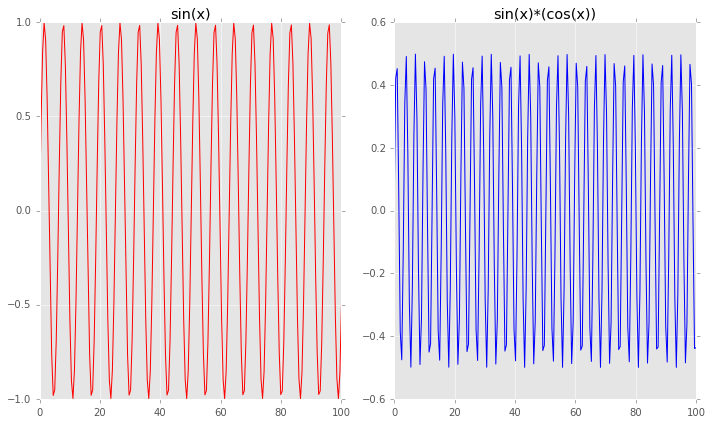

In [43]:
# SUBPLOTS
# the first figure
plt.subplot(1,2,1)
plt.plot(x,y1,'red')
plt.title('sin(x)')

# the second figure
plt.subplot(1,2,2)
plt.plot(x,y2,'blue')
plt.title('sin(x)*(cos(x))')

# automatically adjust the subplot parameters to give a specified padding
plt.tight_layout()
plt.show()


In [45]:
# import pandas
import pandas as pd
# import sklearn datasets
from sklearn import datasets
# load iris dataset
iris = datasets.load_iris()

# create dataframe
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)

# create target
iris_df['target'] = iris.target

# map the target values to the target names
iris_df['target_name'] =iris_df.target.map(
    {0: 'setosa', 
     1: 'versicolor',
     2: 'virginica'}
)

In [46]:
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


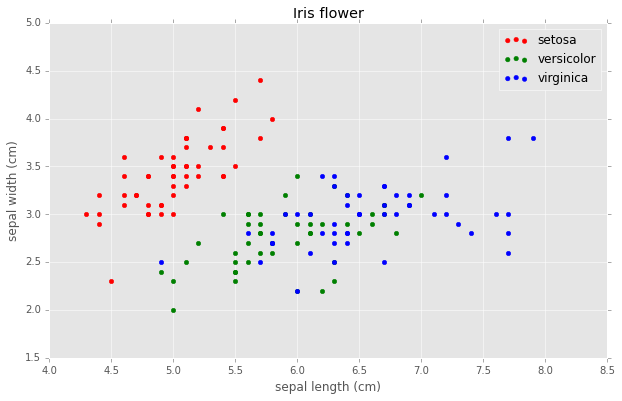

In [47]:
# Iris setosa
setosa = iris_df[iris_df.target_name == 'setosa']

# Iris versicolor
versicolor = iris_df[iris_df.target_name == 'versicolor']

# Iris virginica
virginica = iris_df[iris_df.target_name == 'virginica']

# plot setosa
plt.scatter(setosa['sepal length (cm)'], setosa['sepal width (cm)'],
            marker ='o', color = 'red', label = 'setosa')

# plot versicolor
plt.scatter(versicolor['sepal length (cm)'], versicolor['sepal width (cm)'],
            marker ='o', color = 'green', label = 'versicolor')

# plot virginica
plt.scatter(virginica['sepal length (cm)'], virginica['sepal width (cm)'],
            marker ='o', color = 'blue', label = 'virginica')

# legend location
plt.legend(loc='upper right')

# plot title
plt.title('Iris flower')

# x-axis title
plt.xlabel('sepal length (cm)')

# y-axis title
plt.ylabel('sepal width (cm)')
plt.show()

In [49]:
setosa.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


To add annotations we used the plt.annotate() function. The xy parameter is a tuple containing the position which the arrow is pointing to. The xytext is a tuple containing the position where the text of the annotation is placed.

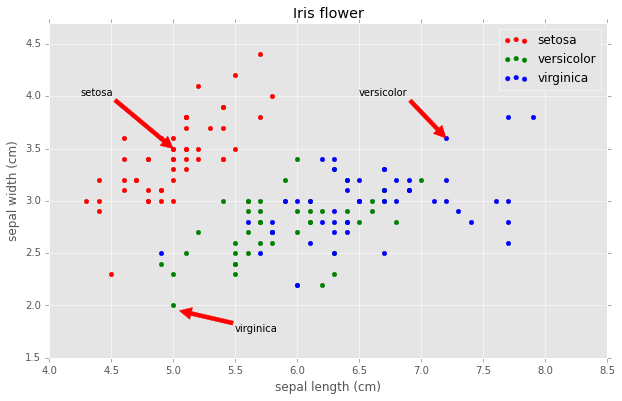

In [50]:
# the same code as before
plt.scatter(setosa['sepal length (cm)'],setosa['sepal width (cm)'],
            marker ='o', color = 'red', label = 'setosa')

plt.scatter(versicolor['sepal length (cm)'],versicolor['sepal width (cm)'],
            marker ='o', color = 'green', label = 'versicolor')

plt.scatter(virginica['sepal length (cm)'],virginica['sepal width (cm)'],
            marker ='o', color = 'blue', label = 'virginica')

# new lines of code
# it can be tricky to find the right coordinates for the first time
######################
plt.annotate('setosa', xy =(5.0,3.5),
             xytext = (4.25,4.0), arrowprops={'color':'red'})
plt.annotate('versicolor', xy =(7.2,3.6),
             xytext = (6.5,4.0), arrowprops={'color':'red'})
plt.annotate('virginica', xy =(5.05,1.95),
             xytext = (5.5,1.75), arrowprops={'color':'red'})
######################

# the same code as before
plt.legend(loc='upper right')
plt.title('Iris flower')
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.ylim(1.5,4.7)
plt.show()